Importing libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings #so as ignore warnings which appear during code warnings can be updation of libraires
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

To upload wine data

In [3]:
wine_dataset=pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Red%20Wine/winequality-red.csv')
wine_dataset

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [4]:
#no. of rows and columns in dataset
wine_dataset.shape

(1599, 12)

In [5]:
#to get first 5 rows of the dataset
wine_dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
#checking for null values
wine_dataset.isnull()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,False,False,False,False,False,False,False,False,False,False,False,False
1595,False,False,False,False,False,False,False,False,False,False,False,False
1596,False,False,False,False,False,False,False,False,False,False,False,False
1597,False,False,False,False,False,False,False,False,False,False,False,False


In [7]:
wine_dataset.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Here we can observe that,there are no missing or null values present in the dataset.

Data visualization

In [8]:
#to get statistical measures of the dataset
wine_dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


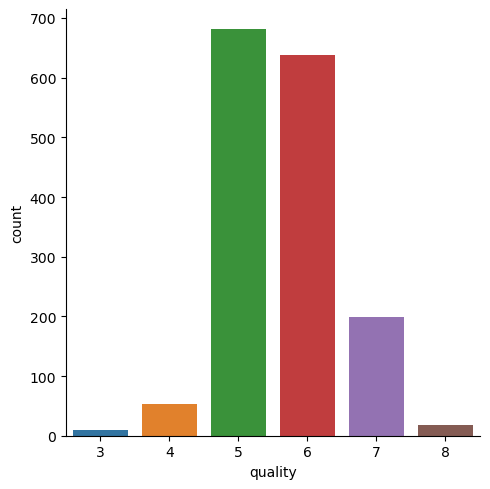

In [9]:
# number of values for each wine quality
sns.catplot(x='quality', data = wine_dataset, kind = 'count')

Now we will compare each attribute with quality to check correlation between them

<Axes: xlabel='quality', ylabel='volatile acidity'>

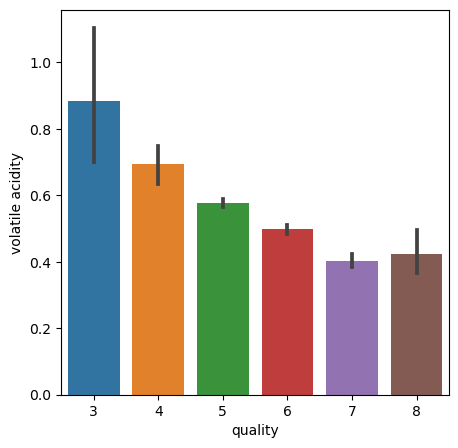

In [10]:
# 1) Volatile acidity vs Quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y = 'volatile acidity', data = wine_dataset)

In this we can observe that as volatile acidity increases wine quality decreases. So volatile acidity and quality are inversely proportional. For best quality wine the values must be in between 0.35 to 0.4.

<Axes: xlabel='quality', ylabel='citric acid'>

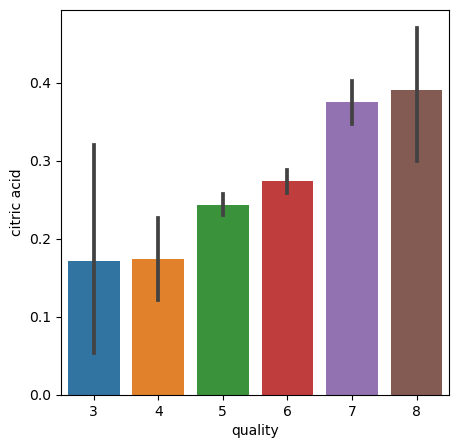

In [11]:
# 2) Citric acid vs Quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y = 'citric acid', data = wine_dataset)

In this we can observe that as citric acid value increases wine quality increases. So citric acid and quality are directly proportional.

<Axes: xlabel='quality', ylabel='residual sugar'>

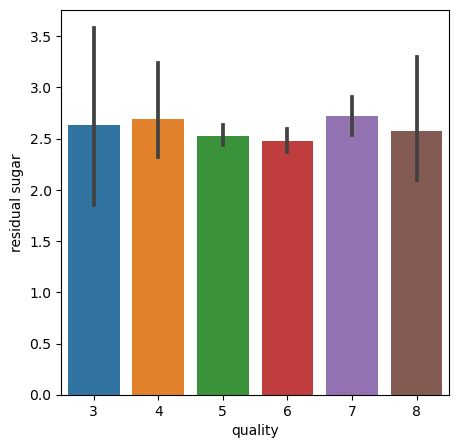

In [12]:
# 3) residual sugar vs Quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y = 'residual sugar', data = wine_dataset)

In this we are not getting proper result so as to compare between residual and quality.

<Axes: xlabel='quality', ylabel='chlorides'>

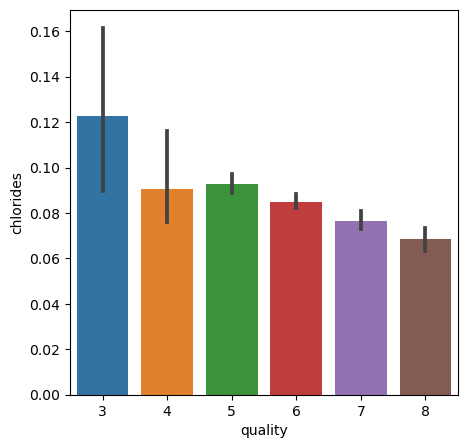

In [13]:
# 4) chlorides vs Quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y = 'chlorides', data = wine_dataset)

In this we can observe that as cholorides increases wine quality decreases. So chlorides and quality are inversely proportional. For best quality wine the values must be in between 0.65 to 0.75

<Axes: xlabel='quality', ylabel='free sulfur dioxide'>

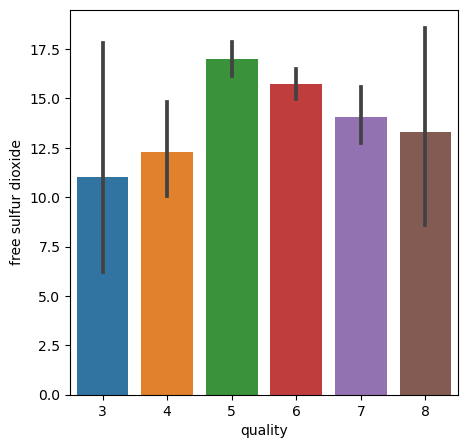

In [14]:
# 5) free sulphur dioxide vs Quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y = 'free sulfur dioxide', data = wine_dataset)

In this we cannot compare free sulfur dioxide and quality directly as it doesn't show proper positive or negative correlation, but we can say that for best quality wine free sulfur dioxide should be in range between 12.7-13.2.

<Axes: xlabel='quality', ylabel='total sulfur dioxide'>

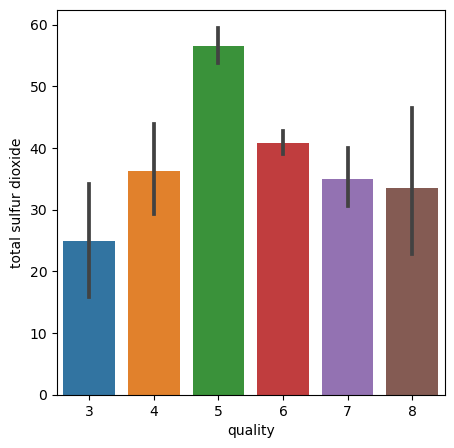

In [15]:
# 6) total sulphur dioxide vs Quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y = 'total sulfur dioxide', data = wine_dataset)

In this we cannot compare total sulfur dioxide and quality directly as it doesn't show proper positive or negative correlation, but we can say that for best quality wine total sulfur dioxide should be in range between 34-36.

<Axes: xlabel='quality', ylabel='density'>

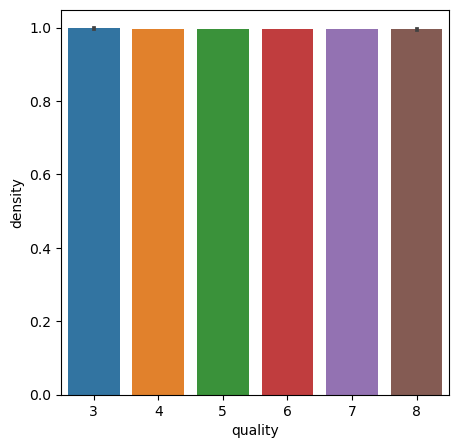

In [16]:
# 7) density vs Quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y = 'density', data = wine_dataset)

From the above result we can observe that density is same for all quality values

<Axes: xlabel='quality', ylabel='pH'>

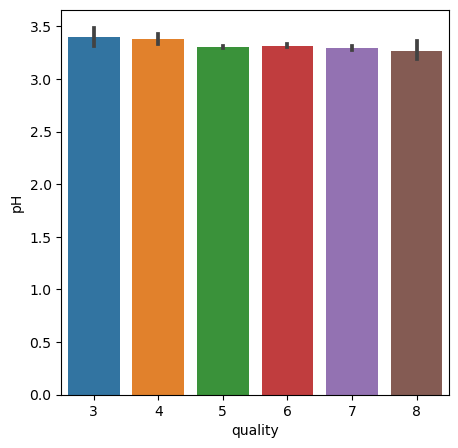

In [17]:
# 8) ph vs Quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y = 'pH', data = wine_dataset)

From the above result we can observe that pH is approximately same for all quality values

<Axes: xlabel='quality', ylabel='sulphates'>

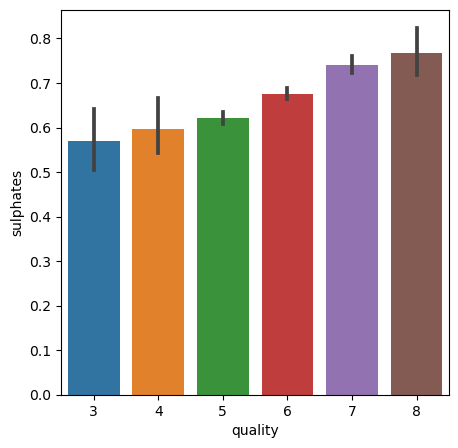

In [18]:
# 9) sulphates vs Quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y = 'sulphates', data = wine_dataset)

In this we can observe that as sulphates value increases wine quality increases. So sulphates and quality are directly proportional and the values must be in between 0.72-0.76 for best quality wine.

<Axes: xlabel='quality', ylabel='alcohol'>

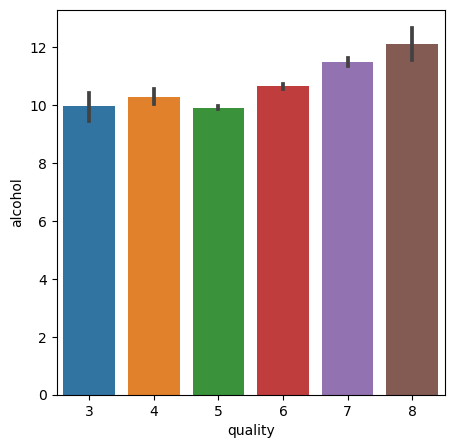

In [19]:
# 10) alcohol vs Quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y = 'alcohol', data = wine_dataset)

In this we can observe that as alcohol value increases wine quality increases. So alcohol and quality are directly proportional and the values must be in between 11-12 for best quality wine.

In [20]:
#Correlation
correlation = wine_dataset.corr()

<Axes: >

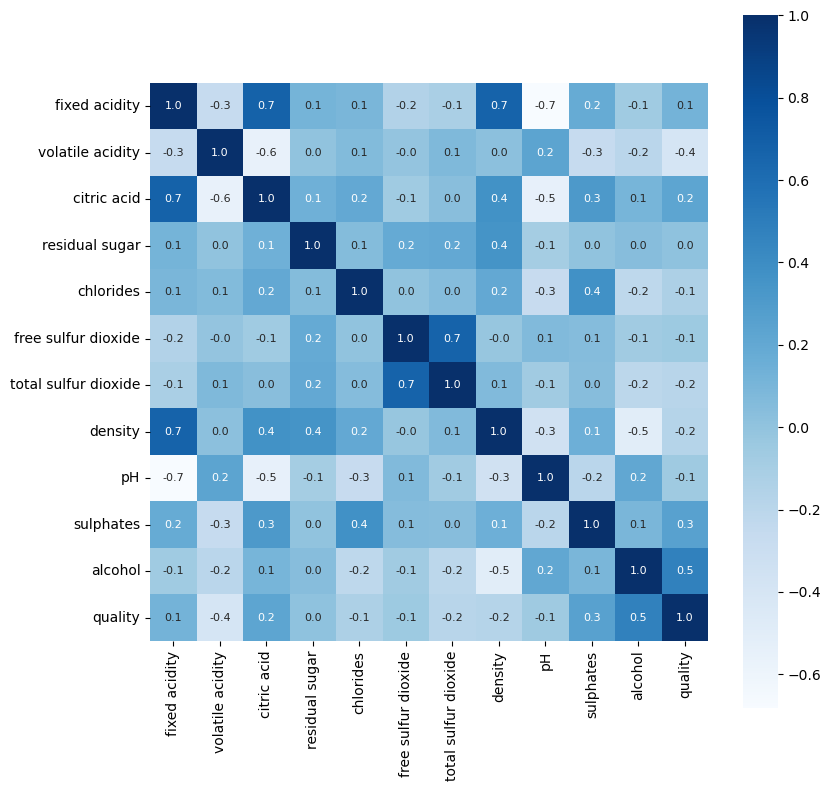

In [21]:
# constructing a heatmap to understand the correlation between the columns
plt.figure(figsize=(9,9))
sns.heatmap(correlation, cbar=True, square=True, fmt = '.1f', annot = True, annot_kws={'size':8}, cmap = 'Blues')

Here we can observe that i.e in the last(quality) column that alcohol, fixed acidity,sulphates and citric acid shows positive correlation with quality attribute, whereas volatile acidity,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH  shows negative correlation with quality attribute

In [22]:
# separate the data and Label i.e quality from the dataset
X = wine_dataset.drop('quality',axis=1)

In [23]:
print(X)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

In [24]:
Y = wine_dataset['quality'].apply(lambda y_value: 1 if y_value>=7 else 0)

In this step we will either give 0 or 1 values to quality column instead of 5-6 values. We will give 1 that assures good quality wine if wine quality is greater then or equal to 7 or we will give 0 that assures bad quality if wine quality is less than 7.

In [25]:
print(Y)

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64


In [26]:
#Splitting of Training and testing data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [27]:
print(Y.shape, Y_train.shape, Y_test.shape)

(1599,) (1279,) (320,)


Here we can see that total values is 1599 out of which traning data is 1279 and testing data is 320

1)Random Forest Classifier

In [28]:
model = RandomForestClassifier()

In [29]:
model.fit(X_train, Y_train)

RandomForestClassifier()

Accuracy

In [30]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [31]:
print('Accuracy : ', test_data_accuracy)

Accuracy :  0.921875


Using random forest classifer we are getting accuarcy score of 92.18%

Checking for good/bad quality wine

In [37]:
#First predicting value
input_data = (7.5,0.5,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.8,10.5)

#Second predicting value
#input_data = (7.3,0.65,0.0,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10)
# here we are changing the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the data as we are predicting the label for only one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction==1):
  print('Good Quality Wine')
else:
  print('Bad Quality Wine')

[0]
Bad Quality Wine


Here in the above step I'm giving some values to check if the wine quality is good or bad.The values is from dataset only.

In [39]:
from sklearn.ensemble import RandomForestClassifier ,ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier , AdaBoostClassifier , BaggingClassifier
from sklearn.metrics import classification_report , confusion_matrix , roc_curve , accuracy_score
from sklearn.model_selection import cross_val_score

2)Logistic Regression

In [46]:
#checking accuracy for logistic regression
LR= LogisticRegression()
LR.fit(X_train,Y_train)
predLR=LR.predict(X_test)
print(accuracy_score(Y_test,predLR))
print(confusion_matrix(Y_test,predLR))
print(classification_report(Y_test,predLR))

0.884375
[[269  10]
 [ 27  14]]
              precision    recall  f1-score   support

           0       0.91      0.96      0.94       279
           1       0.58      0.34      0.43        41

    accuracy                           0.88       320
   macro avg       0.75      0.65      0.68       320
weighted avg       0.87      0.88      0.87       320



Using logistic regression model we are getting accuracy of 88.43%

3)Support Vector Machine Classifier

In [47]:
#checking accuracy for svm
svc= SVC()
svc.fit(X_train,Y_train)
predLR=svc.predict(X_test)
print(accuracy_score(Y_test,predLR))
print(confusion_matrix(Y_test,predLR))
print(classification_report(Y_test,predLR))

0.875
[[279   0]
 [ 40   1]]
              precision    recall  f1-score   support

           0       0.87      1.00      0.93       279
           1       1.00      0.02      0.05        41

    accuracy                           0.88       320
   macro avg       0.94      0.51      0.49       320
weighted avg       0.89      0.88      0.82       320



Using svm we are getting accuracy of 87.5%

4)Gradient Boosting Classifier

In [49]:
#checking the accuracy for Gradient Boosting Classifier
GB= GradientBoostingClassifier()
GB.fit(X_train,Y_train)
predLR=GB.predict(X_test)
print(accuracy_score(Y_test,predLR))
print(confusion_matrix(Y_test,predLR))
print(classification_report(Y_test,predLR))

0.90625
[[268  11]
 [ 19  22]]
              precision    recall  f1-score   support

           0       0.93      0.96      0.95       279
           1       0.67      0.54      0.59        41

    accuracy                           0.91       320
   macro avg       0.80      0.75      0.77       320
weighted avg       0.90      0.91      0.90       320



Using gradient boosting classfier we are getting accuracy of 90.62%

5)AdaBoostClassifier

In [51]:
#checking accuracy for AdaBoostClassifier
ABC= AdaBoostClassifier()
ABC.fit(X_train,Y_train)
predLR=ABC.predict(X_test)
print(accuracy_score(Y_test,predLR))
print(confusion_matrix(Y_test,predLR))
print(classification_report(Y_test,predLR))

0.89375
[[263  16]
 [ 18  23]]
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       279
           1       0.59      0.56      0.57        41

    accuracy                           0.89       320
   macro avg       0.76      0.75      0.76       320
weighted avg       0.89      0.89      0.89       320



Using Adaboostclassifier we are getting accuracy of 89.37%

6)BaggingClassifier

In [53]:
#checking the accuracy for BaggingClassifier
BC= BaggingClassifier()
BC.fit(X_train,Y_train)
predLR=GB.predict(X_test)
print(accuracy_score(Y_test,predLR))
print(confusion_matrix(Y_test,predLR))
print(classification_report(Y_test,predLR))

0.90625
[[268  11]
 [ 19  22]]
              precision    recall  f1-score   support

           0       0.93      0.96      0.95       279
           1       0.67      0.54      0.59        41

    accuracy                           0.91       320
   macro avg       0.80      0.75      0.77       320
weighted avg       0.90      0.91      0.90       320



Using the bagging classifier we are getting the accuracy of 90.62%

7)ExtraTreesClassifier

In [54]:
#checking the accuracy for ExtraTreesClassifier
ET= ExtraTreesClassifier()
ET.fit(X_train,Y_train)
predLR=GB.predict(X_test)
print(accuracy_score(Y_test,predLR))
print(confusion_matrix(Y_test,predLR))
print(classification_report(Y_test,predLR))

0.90625
[[268  11]
 [ 19  22]]
              precision    recall  f1-score   support

           0       0.93      0.96      0.95       279
           1       0.67      0.54      0.59        41

    accuracy                           0.91       320
   macro avg       0.80      0.75      0.77       320
weighted avg       0.90      0.91      0.90       320



Using the ExtraTreesClassifier we are getting accuracy score of 90.625%

By using 7 different models all the model are giving good accuracy but the RandomForestClassifer is giving the best accuracy score of 92.18%, so we should use this model for predicting best quality wine